Здесь я построю графики для наглядного демонстрирования почему такой способ предсказания доллара не работает(. Иначе говоря, рубрика "Вместо тысячи слов"

In [48]:
import pandas

sample_data = pandas.read_csv('sample_data.csv', index_col='date')
sample_data

,prediction,real_value
date,,
2018-01-19,59.486724,56.574786
2018-02-03,59.750129,56.271053
2018-02-18,59.382210,56.393132
2018-03-05,59.720971,57.120338
2018-03-20,59.684684,57.711470
...,...,...
2020-06-22,70.309670,69.455008
2020-07-07,69.104076,71.646413
2020-07-22,70.523115,70.788392


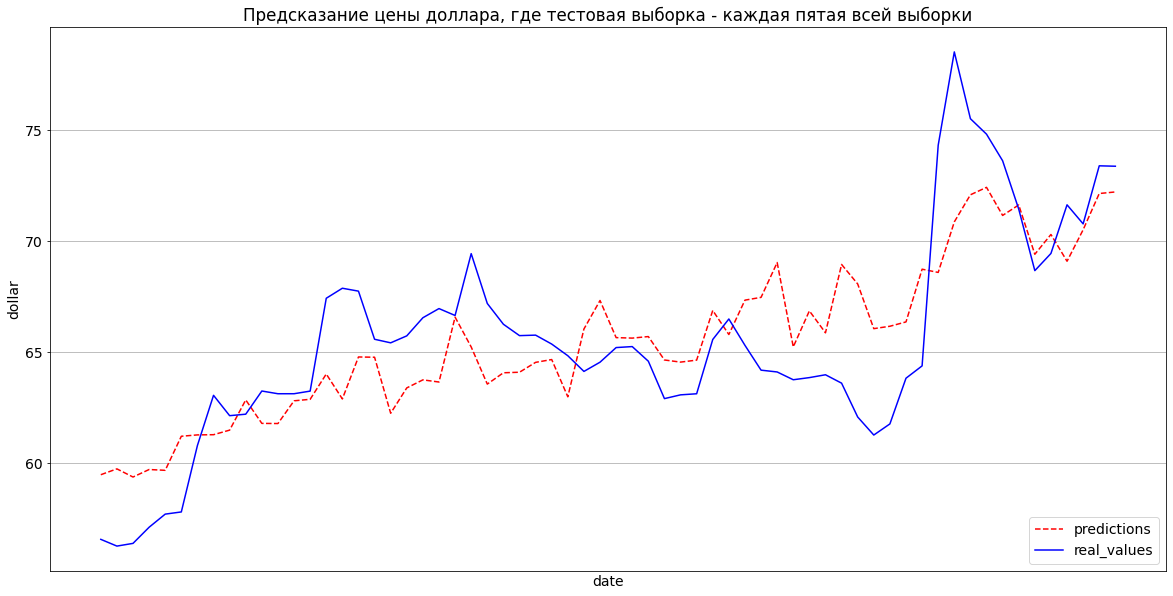

In [50]:
import matplotlib.pyplot as plt

def plot(data, title):
  fig = plt.figure(figsize=(20,10))

  line1, = plt.plot(data['prediction'], 'r--', label='predictions')
  line2, = plt.plot(data['real_value'], 'b', label = 'real_values')
  plt.legend(handles=[line1, line2], loc='lower right')
  plt.title(title)
  plt.xlabel("date")
  plt.ylabel("dollar")
  ax = plt.gca()
  ax.grid()
  ax.axes.xaxis.set_ticks([])
  plt.rcParams.update({'font.size': 14})

  plt.show()

plot(sample_data, 'Предсказание цены доллара, где тестовая выборка - каждая пятая всей выборки')

In [57]:
def simple_estimate(data):
  sum = 0
  for i in range(1, len(data['prediction'])):
    dif1 = data['prediction'][i] - data['prediction'][i - 1]
    dif2 = data['real_value'][i] - data['real_value'][i - 1]
    if (dif1 >= 0 and dif2 >= 0) or (dif1 <= 0 and dif2 <= 0):
      sum += 1
  print('Оценка классификационной составляющей задачи (поднялся или упал курс по сравнению с предыдущим значением): ', sum / len(data['prediction']))

simple_estimate(sample_data)

Оценка классификационной составляющей задачи (поднялся или упал курс по сравнению с предыдущим значением):  0.5


In [74]:
from math import sqrt, exp

def func(x):
  return exp(-x)

def reg_estimate(data):
  sum = 0
  for i in range(len(data['prediction'])):
    dif = abs(data['real_value'][i] - data['prediction'][i])
    sum += func(dif)
  print('Оценка регрессионной составляющей задачи (насколько близко предсказаны значения): ', sum / len(data['prediction']))

reg_estimate(sample_data)

Оценка регрессионной составляющей задачи (насколько близко предсказаны значения):  0.22645426899522736


In [52]:
latest_data = pandas.read_csv('latest_data.csv', index_col='date')
latest_data

,prediction,real_value
date,,
2020-02-14,62.985774,63.559860
2020-02-17,62.968524,63.456760
2020-02-20,64.033704,63.768304
2020-02-23,63.376655,64.390334
2020-02-26,63.297511,65.505103
...,...,...
2020-08-09,66.305235,73.601845
2020-08-12,66.962443,73.316880
2020-08-15,67.657167,73.296368


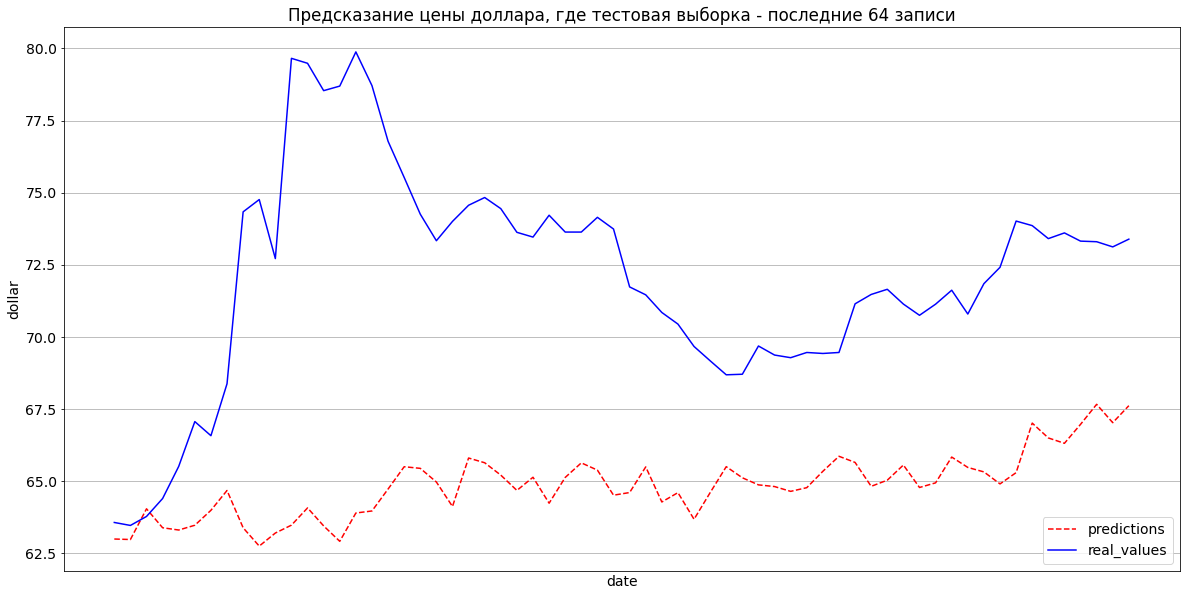

In [69]:
plot(latest_data, 'Предсказание цены доллара, где тестовая выборка - последние 64 записи')

In [54]:
simple_estimate(latest_data)

Совпадение локального поведения курса составляет:  0.4375


In [75]:
reg_estimate(latest_data)

Оценка регрессионной составляющей задачи (насколько близко предсказаны значения):  0.04305767193937715


**Вывод:**

Как можно заметить по полученным визуализациям и данным у меня ужасно вышло предсказать курс доллара основываясь исключительно на новостях и квартале года. 

Могу ли я назвать эксперимент неудачным? Наверное да. Но можно однозначно сделать следующий вывод: курс явно зависит не только от тех данных, что я рассмотрел + следует использовать более сложные модели. Известно, что задача предсказания курса чего либо - задача предсказания временного ряда. Так что моя попытка, вероятно, была обречена на провал на уровне появления идеи. Но я рад, что смог реализовать хоть и неудачный, но все же малый проект.

По поводу оценки регрессии - знаю, ужасно, но наглядно и неплохо соотносится с графиком

Что можно было дополнить к имеющимся данным. Напомню, это наивная реализация проекта, показывающая прежде всего навыки сбора, подготовки, реализации и оценки информации. Что касается сбора информации - можно было бы дополнить выборку (сделать только по ней) твиттами Трампа, ну и новости центробанка. Также следовало бы сделать отбор новостей по неким критериям, например, при наличии слов: санкции, нефть и тд. Думаю это могло немного улучшить результаты. Обработка информации - уверен, что следовало бы иначе обработать поле 'date'. Идея с кварталом мне и сейчас кажется удачной, но вот год скорее только мешает обучению.